In [1]:
import os
import glob


In [2]:
filename = os.path.join('data', '03_Prod.mdout')

In [3]:
f = open(filename, 'r')

In [4]:
data = f.readlines()

In [6]:
f.close()

In [10]:
f_write = open('tot_E.txt', 'w+')
for line in data:
    if 'Etot' in line:
        f_write.write(f'{line.split()[2]}\n')
f_write.close()

### Working with tabular data

In [11]:
import os
import numpy

In [12]:
distance_file = os.path.join('data', 'distance_data_headers.csv')

In [14]:
distances = numpy.genfromtxt(distance_file, delimiter = ',', dtype = 'unicode')

In [15]:
headers = distances[0]

In [19]:
print(headers)

['Frame' 'THR4_ATP' 'THR4_ASP' 'TYR6_ATP' 'TYR6_ASP']


In [17]:
data = distances[1:]

In [18]:
print(data)

[['1' '8.9542' '5.8024' '11.5478' '9.9557']
 ['2' '8.6181' '6.0942' '13.9594' '11.6945']
 ['3' '9.0066' '6.0637' '13.0924' '11.3043']
 ...
 ['9998' '8.6625' '7.7306' '9.5469' '10.3063']
 ['9999' '9.2456' '7.8886' '9.8151' '10.7564']
 ['10000' '8.8135' '7.917' '9.9517' '10.7848']]


In [20]:
data = data.astype(numpy.float)

In [21]:
print(data)

[[1.00000e+00 8.95420e+00 5.80240e+00 1.15478e+01 9.95570e+00]
 [2.00000e+00 8.61810e+00 6.09420e+00 1.39594e+01 1.16945e+01]
 [3.00000e+00 9.00660e+00 6.06370e+00 1.30924e+01 1.13043e+01]
 ...
 [9.99800e+03 8.66250e+00 7.73060e+00 9.54690e+00 1.03063e+01]
 [9.99900e+03 9.24560e+00 7.88860e+00 9.81510e+00 1.07564e+01]
 [1.00000e+04 8.81350e+00 7.91700e+00 9.95170e+00 1.07848e+01]]


In [22]:
print(data[2,1])

9.0066


In [23]:
small_data = data[0:10, 0:3]

In [24]:
print(small_data)

[[ 1.      8.9542  5.8024]
 [ 2.      8.6181  6.0942]
 [ 3.      9.0066  6.0637]
 [ 4.      9.2002  6.0227]
 [ 5.      9.1294  5.9365]
 [ 6.      9.0462  6.2553]
 [ 7.      8.8657  5.9186]
 [ 8.      9.3256  6.2351]
 [ 9.      9.4184  6.1993]
 [10.      9.06    6.0478]]


In [25]:
array1 = small_data[5, :]

In [26]:
print(array1)

[6.     9.0462 6.2553]


In [27]:
array2 = small_data[:, 1:]

In [28]:
print(array2)

[[8.9542 5.8024]
 [8.6181 6.0942]
 [9.0066 6.0637]
 [9.2002 6.0227]
 [9.1294 5.9365]
 [9.0462 6.2553]
 [8.8657 5.9186]
 [9.3256 6.2351]
 [9.4184 6.1993]
 [9.06   6.0478]]


In [29]:
print(data)

[[1.00000e+00 8.95420e+00 5.80240e+00 1.15478e+01 9.95570e+00]
 [2.00000e+00 8.61810e+00 6.09420e+00 1.39594e+01 1.16945e+01]
 [3.00000e+00 9.00660e+00 6.06370e+00 1.30924e+01 1.13043e+01]
 ...
 [9.99800e+03 8.66250e+00 7.73060e+00 9.54690e+00 1.03063e+01]
 [9.99900e+03 9.24560e+00 7.88860e+00 9.81510e+00 1.07564e+01]
 [1.00000e+04 8.81350e+00 7.91700e+00 9.95170e+00 1.07848e+01]]


In [32]:
data.shape

(10000, 5)

In [34]:
len(data[1,:])

5

In [36]:
num_columns = len(data[1, :])

In [37]:
num_columns

5

In [39]:
for num in range(1, num_columns):
    print(f'{headers[num]} : {numpy.mean(data[:,num])}')

THR4_ATP : 10.876950930000001
THR4_ASP : 7.342344959999999
TYR6_ATP : 11.209791329999998
TYR6_ASP : 10.9934435


In [40]:
import matplotlib.pyplot as plt

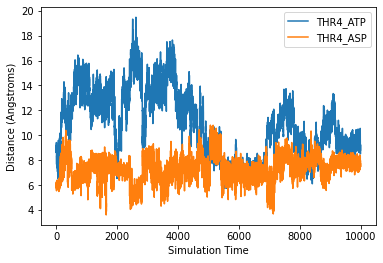

In [53]:
sample = headers[1]
sample2 = headers[2]
plt.figure()
plt.xlabel('Simulation Time')
plt.ylabel('Distance (Angstroms)')
plt.plot(data[:, 1], label = sample)
plt.plot(data[:, 2], label = sample2)
plt.legend()
plt.savefig(f'{sample}_high_quality.png', dpi = 300)


In [44]:
sample = headers[1]

In [45]:
sample

'THR4_ATP'

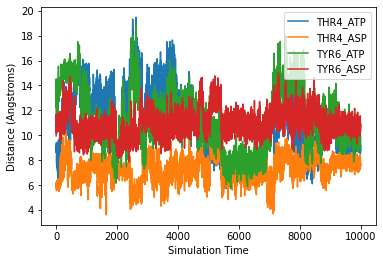

In [57]:
plt.figure() #figure only once
for i in range(1, len(headers)):
    plt.plot(data[:, i], label = headers[i])
    
plt.xlabel('Simulation Time')
plt.ylabel('Distance (Angstroms)')   
plt.legend()


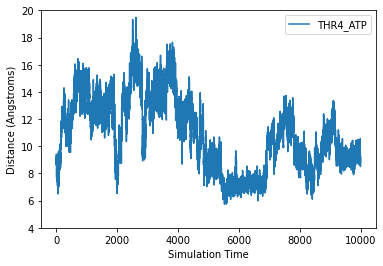

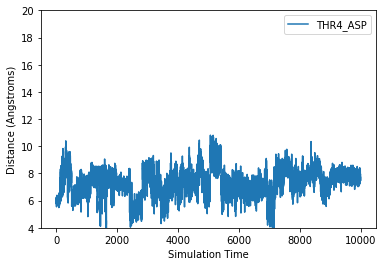

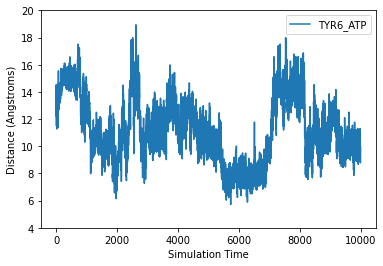

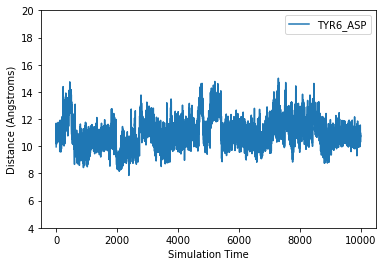

In [60]:

for i in range(1, len(headers)):
    plt.figure() 
    plt.plot(data[:, i], label = headers[i])
    plt.xlabel('Simulation Time')
    plt.ylabel('Distance (Angstroms)')   
    plt.ylim(4,20)
    plt.legend()
    plt.savefig(f'{headers[i]}.png')


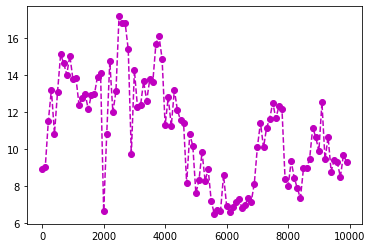

In [64]:
x_data = data[0::100,0] # Less number of data points (smoothing the data)
y_data = data[0::100,1] 
plt.plot(x_data, y_data, '--om')